In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score
# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#making the path to the csv and reading it in
filepath = "cleaned_data/clean_battle_info.csv"

battle_info = pd.read_csv(filepath)
print(battle_info.shape)
battle_info.head(10)

(2351, 8)


,Character,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome,Universe
0,Wonder Woman,7,8,3,Telekinesis,Kryptonite,0,DC Comics
1,Iron Man,4,7,9,Telekinesis,Kryptonite,0,Marvel
2,Iron Man,8,7,5,Telekinesis,Magic,0,Marvel
3,Spider-Man,5,6,10,Telekinesis,Kryptonite,0,Marvel
4,Flash,7,6,2,Invisibility,Magic,0,DC Comics
5,Spider-Man,10,9,7,Invisibility,Wooden Stake,1,Marvel
6,Wonder Woman,3,6,2,Super Strength,Silver,1,DC Comics
7,Thor,7,2,4,Invisibility,Magic,1,Marvel
8,Batman,8,2,7,Flight,Silver,0,DC Comics
9,Iron Man,5,5,4,Flight,Wooden Stake,0,Marvel


In [3]:
# dropping the universe, i dont think that it will add anything to the models as we 
# changed the universe from random to the correct universe
battle_info = battle_info.drop(['Universe'], axis =1)

In [4]:
battle_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2351 non-null   object
 1   Strength          2351 non-null   int64 
 2   Speed             2351 non-null   int64 
 3   Intelligence      2351 non-null   int64 
 4   SpecialAbilities  2351 non-null   object
 5   Weaknesses        2351 non-null   object
 6   BattleOutcome     2351 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 128.7+ KB


In [5]:
battle_info['SpecialAbilities'].unique()

array(['Telekinesis', 'Invisibility', 'Super Strength', 'Flight'],
      dtype=object)

In [6]:
battle_info['Weaknesses'].unique()

array(['Kryptonite', 'Magic', 'Wooden Stake', 'Silver'], dtype=object)

## Preprocessing without a pipeline

In [7]:
#making a copy of the DF just to be safe
battle_info2 = battle_info.copy()

In [8]:
# One Hot Encoding
battle_info2["SpecialAbilities"] = battle_info2.SpecialAbilities.astype(str)
battle_info2 = pd.get_dummies(battle_info2, dtype=int)
battle_info2.head()

,Strength,Speed,Intelligence,BattleOutcome,Character_Batman,Character_Captain America,Character_Flash,Character_Iron Man,Character_Spider-Man,Character_Superman,Character_Thor,Character_Wonder Woman,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake
0,7,8,3,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
1,4,7,9,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,8,7,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,5,6,10,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,7,6,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [9]:
# doing a standard scaler on the numeric data 
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(battle_info2[['Strength', 'Speed', 'Intelligence']]) 

# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['Strength', 'Speed', 'Intelligence'])

# Assign the scaled data back to the original DataFrame
battle_info2[['Strength', 'Speed', 'Intelligence']] = scaled_df

# Display the updated DataFrame
battle_info2.head()

,Strength,Speed,Intelligence,BattleOutcome,Character_Batman,Character_Captain America,Character_Flash,Character_Iron Man,Character_Spider-Man,Character_Superman,Character_Thor,Character_Wonder Woman,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake
0,0.537620,0.879933,-0.890985,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
1,-0.498117,0.530073,1.204769,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,0.882866,0.530073,-0.192401,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,-0.152871,0.180213,1.554061,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,0.537620,0.180213,-1.240278,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [10]:
# # label encoding the universe to make it easier for the models later just in case
# # ended up dropping the universe, commenting out incase we need this in the future 
# le = LabelEncoder()
# battle_encoded2['Universe_encoded'] = le.fit_transform(battle_encoded2['Universe'])
# battle_encoded2.head()

In [11]:
battle_info2.columns

Index(['Strength', 'Speed', 'Intelligence', 'BattleOutcome',
       'Character_Batman', 'Character_Captain America', 'Character_Flash',
       'Character_Iron Man', 'Character_Spider-Man', 'Character_Superman',
       'Character_Thor', 'Character_Wonder Woman', 'SpecialAbilities_Flight',
       'SpecialAbilities_Invisibility', 'SpecialAbilities_Super Strength',
       'SpecialAbilities_Telekinesis', 'Weaknesses_Kryptonite',
       'Weaknesses_Magic', 'Weaknesses_Silver', 'Weaknesses_Wooden Stake'],
      dtype='object')

In [12]:
battle_info2.dtypes

Strength                           float64
Speed                              float64
Intelligence                       float64
BattleOutcome                        int64
Character_Batman                     int64
Character_Captain America            int64
Character_Flash                      int64
Character_Iron Man                   int64
Character_Spider-Man                 int64
Character_Superman                   int64
Character_Thor                       int64
Character_Wonder Woman               int64
SpecialAbilities_Flight              int64
SpecialAbilities_Invisibility        int64
SpecialAbilities_Super Strength      int64
SpecialAbilities_Telekinesis         int64
Weaknesses_Kryptonite                int64
Weaknesses_Magic                     int64
Weaknesses_Silver                    int64
Weaknesses_Wooden Stake              int64
dtype: object

In [13]:
corrs = battle_info2.corr()
corrs

,Strength,Speed,Intelligence,BattleOutcome,Character_Batman,Character_Captain America,Character_Flash,Character_Iron Man,Character_Spider-Man,Character_Superman,Character_Thor,Character_Wonder Woman,SpecialAbilities_Flight,SpecialAbilities_Invisibility,SpecialAbilities_Super Strength,SpecialAbilities_Telekinesis,Weaknesses_Kryptonite,Weaknesses_Magic,Weaknesses_Silver,Weaknesses_Wooden Stake
Strength,1.000000,-0.041399,0.011212,0.299753,0.022005,-0.028083,0.012566,0.000705,-0.015051,-0.004331,0.026272,-0.014438,0.012473,-0.010036,-0.010994,0.008647,0.009233,-0.006834,0.027072,-0.029274
Speed,-0.041399,1.000000,-0.001245,0.176810,-0.002893,0.009085,0.007175,0.015283,-0.016500,-0.024231,0.028592,-0.016414,0.003750,0.054004,-0.034757,-0.024210,-0.007996,-0.009251,0.020254,-0.002586
Intelligence,0.011212,-0.001245,1.000000,0.246996,-0.019608,0.034756,0.025013,0.013362,-0.012483,-0.020770,0.006378,-0.025802,-0.000716,0.001995,-0.009053,0.007743,0.025446,-0.006119,0.010849,-0.030666
BattleOutcome,0.299753,0.176810,0.246996,1.000000,0.012171,0.007967,0.006443,0.017029,0.013009,-0.018751,-0.001224,-0.035035,-0.116203,0.056695,0.171831,-0.112397,-0.276836,0.100470,0.135934,0.051392
Character_Batman,0.022005,-0.002893,-0.019608,0.012171,1.000000,-0.134104,-0.138458,-0.142478,-0.134379,-0.142212,-0.140073,-0.143010,0.011350,-0.016868,-0.015670,0.021446,-0.016556,0.025613,-0.016492,0.007956
Character_Captain America,-0.028083,0.009085,0.034756,0.007967,-0.134104,1.000000,-0.137894,-0.141898,-0.133831,-0.141633,-0.139503,-0.142428,-0.035717,0.014711,0.001137,0.019937,-0.009062,0.011705,-0.008871,0.006475
Character_Flash,0.012566,0.007175,0.025013,0.006443,-0.138458,-0.137894,1.000000,-0.146505,-0.138176,-0.146231,-0.144032,-0.147052,0.033290,-0.021342,0.004388,-0.016233,0.010466,0.024032,-0.047392,0.012145
Character_Iron Man,0.000705,0.015283,0.013362,0.017029,-0.142478,-0.141898,-0.146505,1.000000,-0.142188,-0.150477,-0.148214,-0.151321,-0.001617,0.036839,0.011155,-0.047179,0.004390,-0.004808,0.011153,-0.010705
Character_Spider-Man,-0.015051,-0.016500,-0.012483,0.013009,-0.134379,-0.133831,-0.138176,-0.142188,1.000000,-0.141923,-0.139788,-0.142719,-0.006077,-0.004105,0.015718,-0.005387,0.007932,-0.007583,-0.006499,0.005700
Character_Superman,-0.004331,-0.024231,-0.020770,-0.018751,-0.142212,-0.141633,-0.146231,-0.150477,-0.141923,1.000000,-0.147937,-0.151039,0.013655,0.014624,-0.005743,-0.023005,-0.000515,-0.018906,0.032631,-0.012893


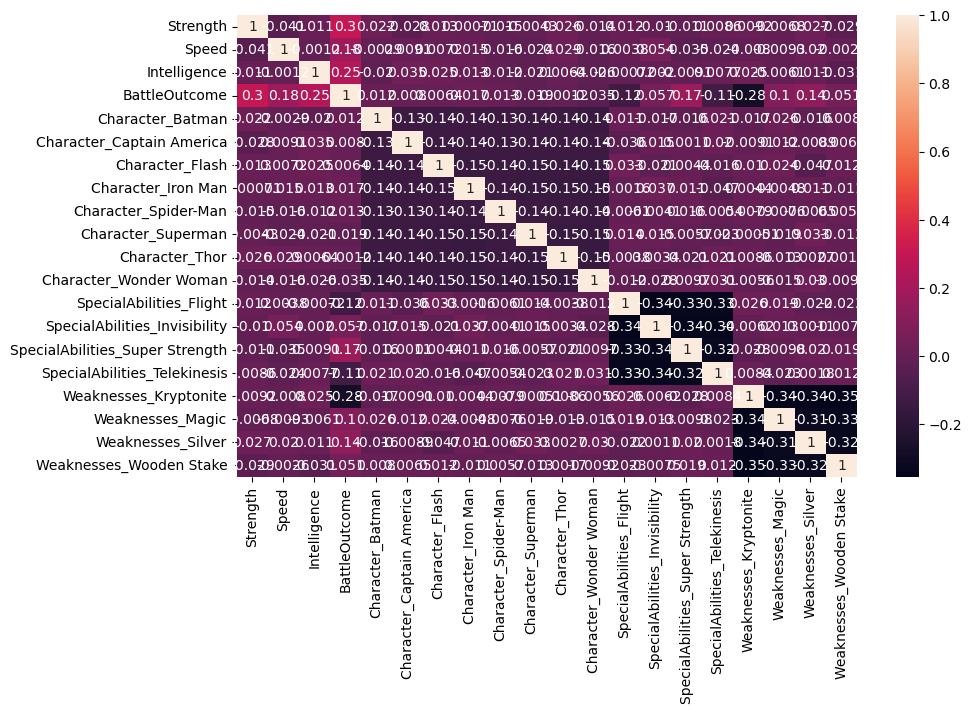

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs, annot=True)
plt.show()

In [15]:
abs(corrs.BattleOutcome).sort_values(ascending=False)

BattleOutcome                      1.000000
Strength                           0.299753
Weaknesses_Kryptonite              0.276836
Intelligence                       0.246996
Speed                              0.176810
SpecialAbilities_Super Strength    0.171831
Weaknesses_Silver                  0.135934
SpecialAbilities_Flight            0.116203
SpecialAbilities_Telekinesis       0.112397
Weaknesses_Magic                   0.100470
SpecialAbilities_Invisibility      0.056695
Weaknesses_Wooden Stake            0.051392
Character_Wonder Woman             0.035035
Character_Superman                 0.018751
Character_Iron Man                 0.017029
Character_Spider-Man               0.013009
Character_Batman                   0.012171
Character_Captain America          0.007967
Character_Flash                    0.006443
Character_Thor                     0.001224
Name: BattleOutcome, dtype: float64

In [17]:
# Step 1: Get the data 
X = battle_info2.drop(columns=["BattleOutcome"])
y = battle_info2.BattleOutcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(1763, 19) (588, 19)


In [18]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[1158  113]
 [ 217  275]]
    
    AUC: 0.8676247177499312

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.91      0.88      1271
           1       0.71      0.56      0.63       492

    accuracy                           0.81      1763
   macro avg       0.78      0.74      0.75      1763
weighted avg       0.80      0.81      0.81      1763

    
TEST METRICS
    Confusion Matrix: 
    [[379  45]
 [ 73  91]]
    
    AUC: 0.8481434077312471

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.89      0.87       424
           1       0.67      0.55      0.61       164

    accuracy                           0.80       588
   macro avg       0.75      0.72      0.74       588
weighted avg       0.79      0.80      0.79       588

    


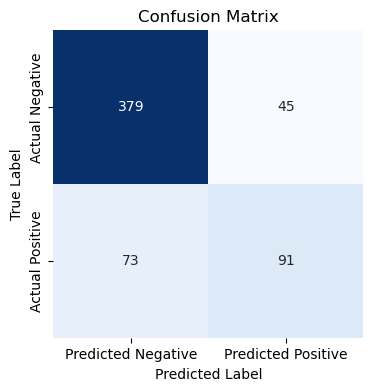

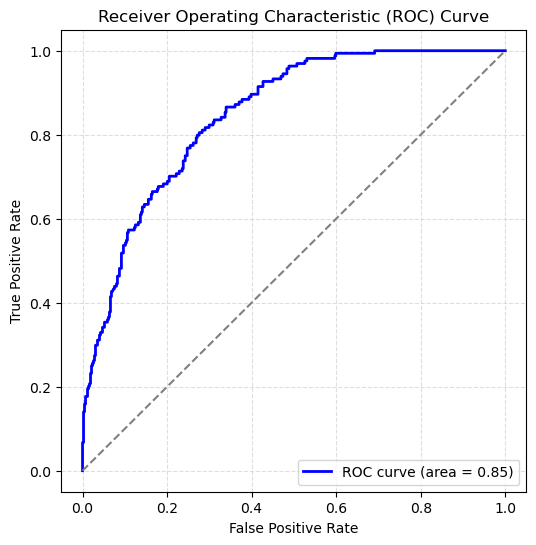

In [19]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1271    0]
 [   9  483]]
    
    AUC: 0.9999352344034849

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      1.00      1271
           1       1.00      0.98      0.99       492

    accuracy                           0.99      1763
   macro avg       1.00      0.99      0.99      1763
weighted avg       0.99      0.99      0.99      1763

    
TEST METRICS
    Confusion Matrix: 
    [[343  81]
 [ 83  81]]
    
    AUC: 0.6582345835250805

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.81      0.81       424
           1       0.50      0.49      0.50       164

    accuracy                           0.72       588
   macro avg       0.65      0.65      0.65       588
weighted avg       0.72      0.72      0.72       588

    


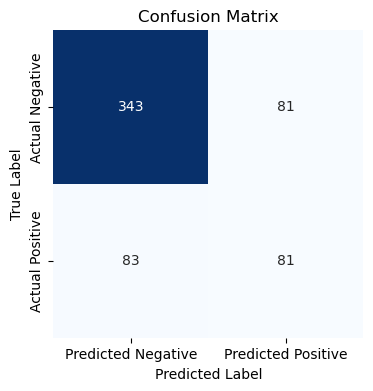

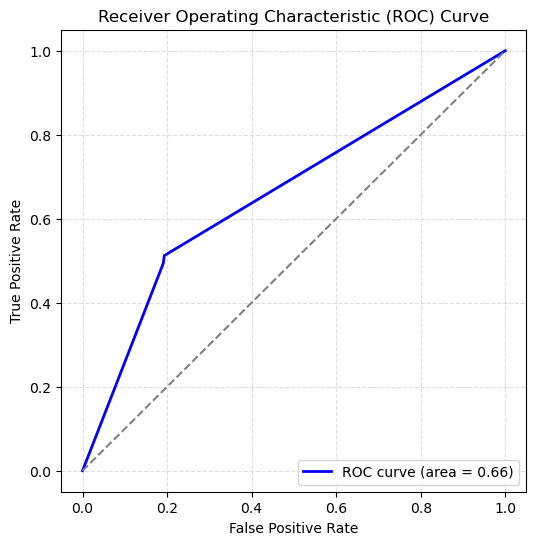

In [20]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1270    1]
 [   8  484]]
    
    AUC: 0.9999352344034849

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      1.00      1271
           1       1.00      0.98      0.99       492

    accuracy                           0.99      1763
   macro avg       1.00      0.99      0.99      1763
weighted avg       0.99      0.99      0.99      1763

    
TEST METRICS
    Confusion Matrix: 
    [[375  49]
 [ 88  76]]
    
    AUC: 0.8084517372296365

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.88      0.85       424
           1       0.61      0.46      0.53       164

    accuracy                           0.77       588
   macro avg       0.71      0.67      0.69       588
weighted avg       0.75      0.77      0.76       588

    


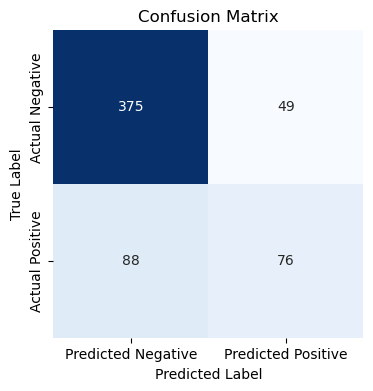

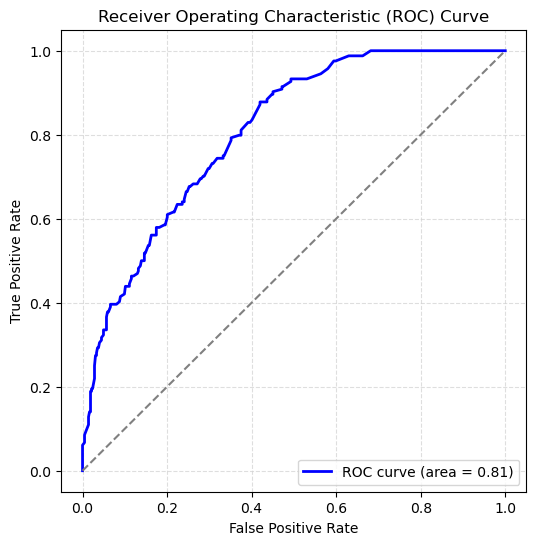

In [21]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1204   67]
 [ 230  262]]
    
    AUC: 0.9036159991812349

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.95      0.89      1271
           1       0.80      0.53      0.64       492

    accuracy                           0.83      1763
   macro avg       0.82      0.74      0.76      1763
weighted avg       0.83      0.83      0.82      1763

    
TEST METRICS
    Confusion Matrix: 
    [[391  33]
 [ 93  71]]
    
    AUC: 0.8211358145421077

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.92      0.86       424
           1       0.68      0.43      0.53       164

    accuracy                           0.79       588
   macro avg       0.75      0.68      0.70       588
weighted avg       0.77      0.79      0.77       588

    


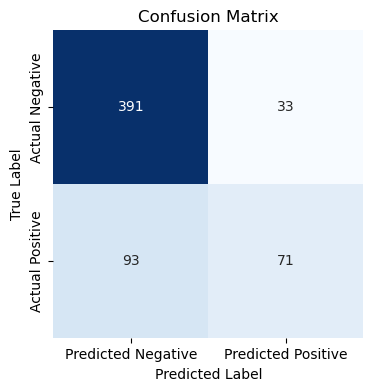

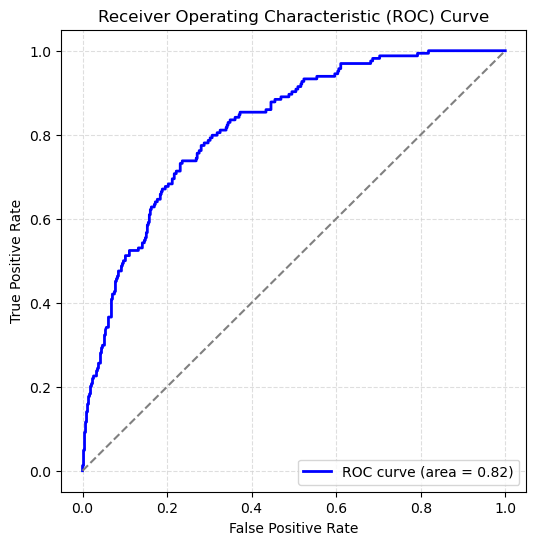

In [22]:
# Step 2: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

In [23]:
# # Step 2: Init the Model
# knn = KNeighborsClassifier(n_neighbors=15)

# # Do Machine Learning
# doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1271    0]
 [   9  483]]
    
    AUC: 0.9999352344034849

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      1.00      1271
           1       1.00      0.98      0.99       492

    accuracy                           0.99      1763
   macro avg       1.00      0.99      0.99      1763
weighted avg       0.99      0.99      0.99      1763

    
TEST METRICS
    Confusion Matrix: 
    [[372  52]
 [ 88  76]]
    
    AUC: 0.779890991716521

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.88      0.84       424
           1       0.59      0.46      0.52       164

    accuracy                           0.76       588
   macro avg       0.70      0.67      0.68       588
weighted avg       0.75      0.76      0.75       588

    


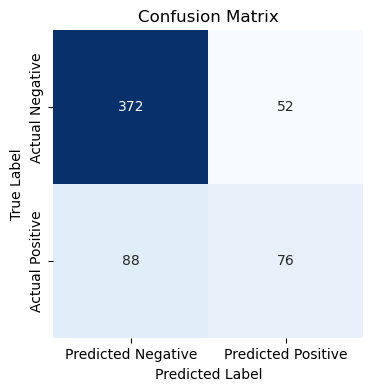

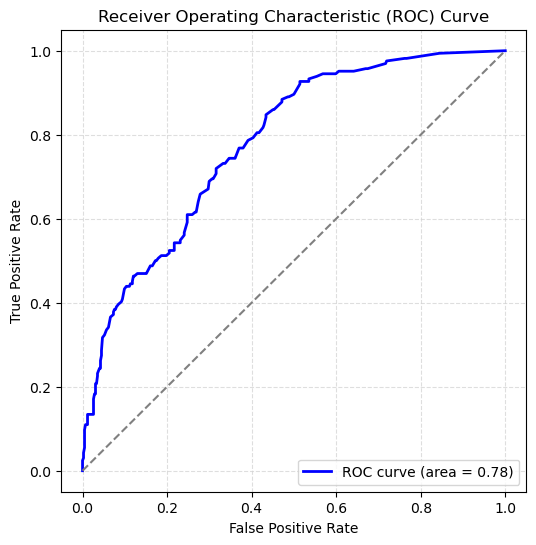

In [24]:
# Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1147  124]
 [ 219  273]]
    
    AUC: 0.8715370395246045

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.90      0.87      1271
           1       0.69      0.55      0.61       492

    accuracy                           0.81      1763
   macro avg       0.76      0.73      0.74      1763
weighted avg       0.80      0.81      0.80      1763

    
TEST METRICS
    Confusion Matrix: 
    [[379  45]
 [ 75  89]]
    
    AUC: 0.8453319144040498

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.89      0.86       424
           1       0.66      0.54      0.60       164

    accuracy                           0.80       588
   macro avg       0.75      0.72      0.73       588
weighted avg       0.79      0.80      0.79       588

    


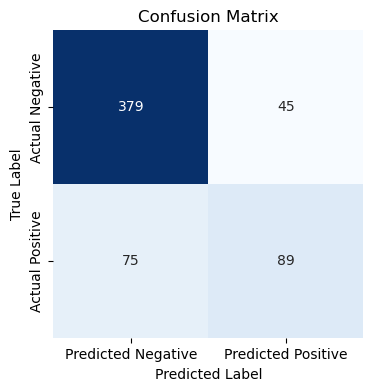

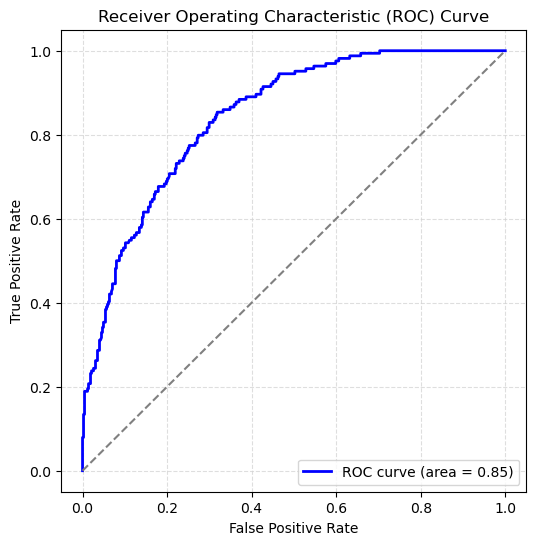

In [25]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1169  102]
 [ 188  304]]
    
    AUC: 0.9102196912999814

    Classification Report:
                  precision    recall  f1-score   support

           0       0.86      0.92      0.89      1271
           1       0.75      0.62      0.68       492

    accuracy                           0.84      1763
   macro avg       0.81      0.77      0.78      1763
weighted avg       0.83      0.84      0.83      1763

    
TEST METRICS
    Confusion Matrix: 
    [[381  43]
 [ 76  88]]
    
    AUC: 0.8413124137137598

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.90      0.86       424
           1       0.67      0.54      0.60       164

    accuracy                           0.80       588
   macro avg       0.75      0.72      0.73       588
weighted avg       0.79      0.80      0.79       588

    


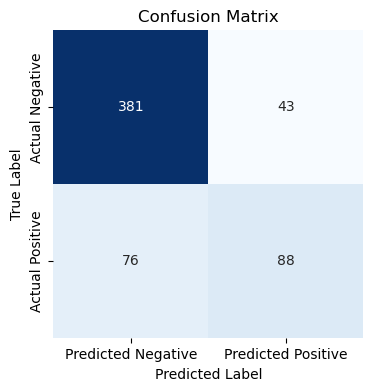

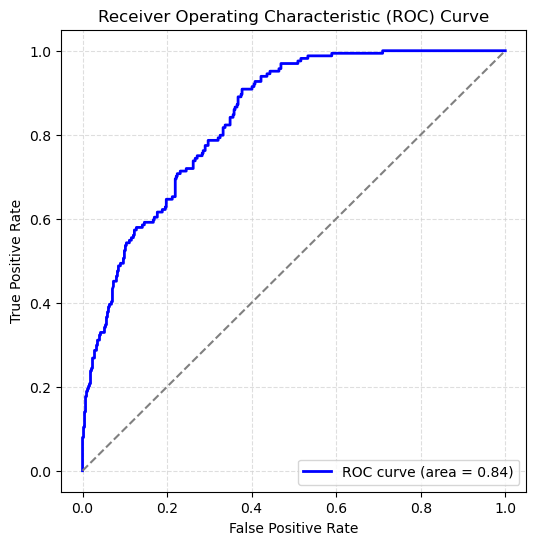

In [26]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [27]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[1266    5]
 [  13  479]]
    
    AUC: 0.9994490926419886

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99      1271
           1       0.99      0.97      0.98       492

    accuracy                           0.99      1763
   macro avg       0.99      0.98      0.99      1763
weighted avg       0.99      0.99      0.99      1763

    
TEST METRICS
    Confusion Matrix: 
    [[359  65]
 [ 83  81]]
    
    AUC: 0.8039217096180395

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.85      0.83       424
           1       0.55      0.49      0.52       164

    accuracy                           0.75       588
   macro avg       0.68      0.67      0.68       588
weighted avg       0.74      0.75      0.74       588

    


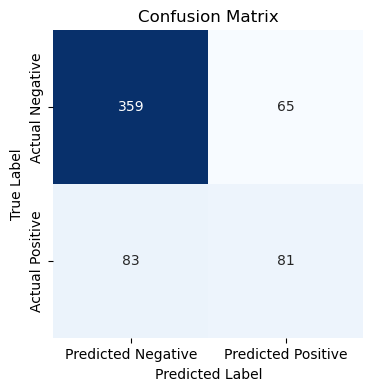

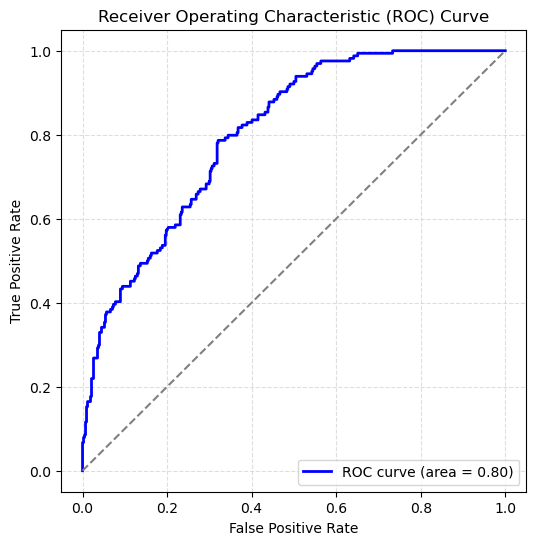

In [28]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

In [29]:
fi = pd.DataFrame(list(zip(X.columns, ada.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
2,Intelligence,0.28
0,Strength,0.26
1,Speed,0.16
15,Weaknesses_Kryptonite,0.06
14,SpecialAbilities_Telekinesis,0.04
13,SpecialAbilities_Super Strength,0.04
11,SpecialAbilities_Flight,0.02
17,Weaknesses_Silver,0.02
16,Weaknesses_Magic,0.02
12,SpecialAbilities_Invisibility,0.02


In [30]:
#tired of scrolling between models, this is showing the values side by side
#adding the confusion matrix too
# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    # 'K Neighbors': KNeighborsClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


# List to store metrics
results = []

# Loop through models, train, and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For AUC

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    # the confusion matrix values should be in this order [[True Negative, False Positive],[ False Negative,True Positive]]
    
    results.append(metrics)

# Convert results to DataFrame
metrics_df = pd.DataFrame(results)

# Display the DataFrame
metrics_df.head(10)

,Model,Accuracy,Precision,Recall,F1 Score,AUC,Confusion Matrix
0,Random Forest,0.768707,0.614754,0.457317,0.524476,0.809171,"[[377, 47], [89, 75]]"
1,Logistic Regression,0.799320,0.669118,0.554878,0.606667,0.848143,"[[379, 45], [73, 91]]"
2,Support Vector Classifier,0.785714,0.682692,0.432927,0.529851,0.821186,"[[391, 33], [93, 71]]"
3,Decision Tree,0.734694,0.525000,0.512195,0.518519,0.673407,"[[348, 76], [80, 84]]"
4,Extra Trees,0.756803,0.580153,0.463415,0.515254,0.780265,"[[369, 55], [88, 76]]"
5,AdaBoost,0.795918,0.664179,0.542683,0.597315,0.845332,"[[379, 45], [75, 89]]"
6,Gradient Boosting,0.797619,0.671756,0.536585,0.596610,0.841312,"[[381, 43], [76, 88]]"


In [33]:
#logistic regression looks like the best option
# Retrain the model on the ENTIRE dataset
lr = LogisticRegression(random_state=42)
lr.fit(X, y)

LogisticRegression(random_state=42)

In [34]:
# Save off my models
import pickle

# Scaler
pickle.dump(scaler, open("battle_scaler.h5", 'wb'))

# Model
pickle.dump(lr, open("battle_model.h5", 'wb'))